In [1]:
%matplotlib notebook
import re
import os

import football.lib as fb

import pandas as pd
import numpy as np
from scipy.stats import zscore
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split


Using Theano backend.


In [2]:
def readfile(fName):
    d = pd.read_csv(fName)
    d = fb.addSideChangeDist(d)
    return d

fNames = os.listdir('valid_data')
iFName = [True if re.search('\d+.csv', x) else False for x in fNames]
fNames = np.array(fNames)[np.array(iFName)]

d = pd.DataFrame()
for fName in fNames[0:10]:
    print(fName)
    d = d.append(readfile('valid_data/' + fName))

2016052108.csv
2016022801.csv
2016052106.csv
2016062509.csv
2016050403.csv
2016061501.csv
2016050802.csv
2016042901.csv
2016052904.csv
2016030505.csv


In [3]:
# %store d

In [4]:
# extract features and target variable
d_player = d.ix[:, 'H1X':'A11Y']
d_ball = d.ix[:, 'BX':'BZ']
d_sideChangeDist = d.ix[:,'sideChangeDist_by_A']
# d_possession = d.ix[:, 'Possession_A']


X = pd.concat([d_player, d_ball], axis = 1).reset_index(drop=True)
y = d_sideChangeDist.reset_index(drop=True)

# Preprocessing

In [5]:
norm_bound = fb.dataInfo.fieldSize_x[1]
X = X/norm_bound
y = y/np.max(y)

In [6]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model and Training

In [ ]:
model = Sequential()

model.add(Dense(100, input_dim=X.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [ ]:
history = model.fit(X_train.as_matrix(), y_train.as_matrix(),
          batch_size=500, nb_epoch=4,
          show_accuracy=True, verbose=1,
          validation_data=(X_test.as_matrix(), y_test.as_matrix()))

/home/acercyc/env/env_1_p34/lib/python3.4/site-packages/keras/models.py:647: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 711827 samples, validate on 177957 samples
Epoch 1/4
711827/711827 [==============================] - 24s - loss: 0.0169 - val_loss: 0.0122

# Prediction 

In [13]:
p = model.predict(X_test.as_matrix())
y_pred = p * np.max(y)

In [14]:
# arrange data for ploting 
y_pred_sorted = y_pred[np.argsort(y_test.index)]
y_test_sorted = y_test.sort_index()

plot_pred = y_pred_sorted
plot_test = y_test_sorted.as_matrix()

plot_pred = zscore(plot_pred)
plot_test = zscore(plot_test)

plot_pred = plot_pred.squeeze()
plot_test = plot_test.squeeze()

<IPython.core.display.Javascript object>


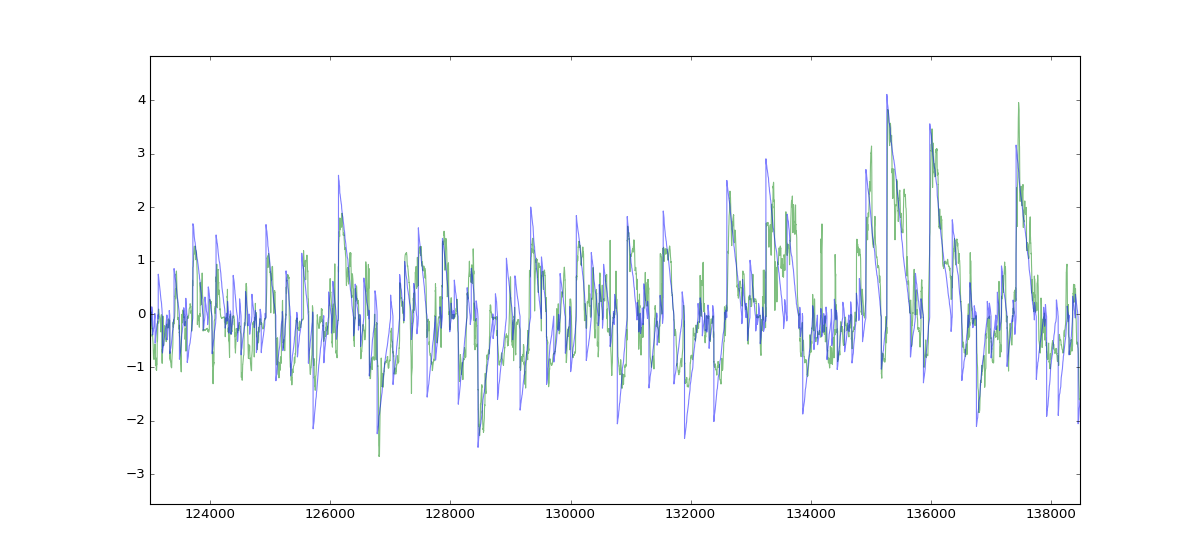

In [15]:
# plot
fig = plt.figure(figsize = (15,7))
plt.plot(plot_pred, 'g', alpha=0.5)
plt.plot(plot_test, 'b', alpha=0.5)
plt.show()

# Validation

In [16]:
np.corrcoef(plot_pred, plot_test)


array([[ 1.        ,  0.84954392],
       [ 0.84954392,  1.        ]])

# Validation across games